# Découverte/Rappel de Numpy

<a href="https://docs.python.org/fr/3/library/stdtypes.html" target="_blank"> NumPy </a > (prononcer numpaille) est une bibliothèque d'extension de python qui propose la manipulation optimisée de tableaux multidimensionnels. En machine learning, de tels tableaux sont utilisés pour stocker les données à traiter. Les différents champs décrivant vos données sont les colonnes (`features`) alors qu'il y a une ligne par n-uplet de données.

Vous pouvez vous imaginer un tableau numpy à deux dimensions comme par exemple une feuille de tableur qui contient les données que vous voulez traiter.

La classe de base est un *ndarray* qui gère les données comme une liste ordonnée mais implémentée de manière beaucoup (beaucoup !) plus rapide que la gestion des listes. Un concept fondamental de Numpy est la vectorisation qui permet de manipuler des vecteurs de manière très naturelle et surtout très efficacement, le code sous-jacent étant en C compilé.

La manière dont on regarde les données stockées dans un ndarray dépendent de la structure dimensionnelle du tableau que l'on veut manipuler. Cette structure est passée par le biais de la variable shape qui est un **tuple** contenant le nombre de cases par dimension. On peut préciser aussi le `dtype` qui fixe la précision des nombres stockés dans le tableau. **Cela a une importance sur la précision et la rapidité de vos programmes et doit faire l'objet du meilleur compromis.**

Les constructeurs courants sont np.array(), np.zeros(), np.ones(), np.random.randn().

In [1]:
import numpy as np
import sys

array1 = np.array([1,2,3,4])
print(array1)
myarray = np.array([x for x in range(5)])
print(myarray)
print(myarray.dtype)
print(sys.getsizeof(myarray))
myarray = np.array([x for x in range(5)],dtype = np.int16)
print(myarray.dtype)
print(sys.getsizeof(myarray))
print(type(myarray.data))
print(sys.getsizeof(myarray.data))
for el in myarray.data:
    print(el)

[1 2 3 4]
[0 1 2 3 4]
int64
152
int16
122
<class 'memoryview'>
184
0
1
2
3
4


In [2]:
myarray = np.array([x for x in range(24)])
print(myarray)
print(myarray.shape)
print(type(myarray.shape))
print(myarray.size) # produit des différentes dimensions

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
(24,)
<class 'tuple'>
24


In [3]:
myarray.reshape((3,8))

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23]])

In [4]:
a2 = myarray.reshape((6,4))
print(a2)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


#### Cas particulier des tableaux à une dimension qui ont une shape un peu particulière qui peut parfois poser des problèmes dans les algorithmes. Il est parfois utile de corriger la shape de ces tableaux.

In [5]:
A = np.array([1,2,3])
print(A.shape)
A = A.reshape((A.shape[0],1)) # ok pour faire du calcul matricielle avec des vecteurs
print(A.shape)
A = A.squeeze() # mais parfois c'est mieux de ne pas avoir le 1 (graphique, image)
print(A.shape)

(3,)
(3, 1)
(3,)


#### Applatir un tableau à plusieurs dimension

In [6]:
A = np.array([[0,0,0,0],[1,1,1,1]])
print(A.shape)
A = A.ravel()
print(A)
print(A.shape)

(2, 4)
[0 0 0 0 1 1 1 1]
(8,)


#### np.ones() et np.zeros()

In [7]:
D1 = np.ones(shape=(4,5), dtype=np.float32)
D2 = np.zeros(shape=(4,5), dtype=np.float32)
print(D1)
print(D2)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [8]:
D1 = np.ones(shape=(4,4), dtype=np.float32)
D1[0,0]=5.
D1[3,3]=6.
#D1[4,4]=7.
D1[2,2]=2.
D1[0,2]=7
print(D1)

[[5. 1. 7. 1.]
 [1. 1. 1. 1.]
 [1. 1. 2. 1.]
 [1. 1. 1. 6.]]



In [9]:
a = np.array([1,"toto",3.])
print(a)
a.dtype

['1' 'toto' '3.0']


dtype('<U32')

## Génération de nombres aléatoires

On utilise le module <a href="https://numpy.org/doc/stable/reference/random/index.html" target="_blank"> random </a> de <a href="https://numpy.org" target="_blank"> NumPy </a> pour générer des variables aléatoires suivant <a href="" target="_blank"> différentes lois </a>. Pour ne pas toujours générer les mêmes nombres, on utilise une graine (`seed`) différente. On peut par exemple l'initialiser avec l'heure.
Une documentation en français simplifiée mais pratique est disponible <a href="http://www.python-simple.com/python-numpy/random-numpy.php"  target="_blank"> ici </a> 

#### Distribution uniforme

In [10]:
argument=(3,2)
A = np.random.random(argument) # distribution uniforme entre 0 et 1, on donne un tuple pour la shape
arg1, arg2 = 3, 2
A2 = np.random.rand(arg1,arg2) # distribution uniforme entre 0 et 1, on donne directement les dimensions
print(A)
print(A2)

[[0.88038126 0.67389653]
 [0.18423684 0.78975805]
 [0.54182577 0.6510466 ]]
[[0.80855795 0.62198778]
 [0.95979668 0.87826922]
 [0.87198688 0.51839844]]


In [11]:
a = 5
b = 10
B = (b-a) * A + a # distribution plate dans [a,b)
print(B)

[[9.40190629 8.36948264]
 [5.92118419 8.94879025]
 [7.70912886 8.25523298]]


#### Distribution gaussienne

In [12]:
A = np.random.randn(3,2) # distribution normale centrée réduite (mu=0, sigma=1)
print(A)
mu = 3.
sigma = 2.
B = sigma * A + mu # distribution gaussienne entre 0 et 1, on donne un tuple pour la shape
print(B)

C = np.random.normal(loc=3., scale=2., size=(3,2))
print(C)

[[-0.00250954  0.96551025]
 [ 0.62937055 -0.70850171]
 [ 0.16344032  1.68288626]]
[[2.99498093 4.93102049]
 [4.25874109 1.58299658]
 [3.32688065 6.36577252]]
[[0.90272178 0.111164  ]
 [3.34342554 7.78103656]
 [4.99026404 1.23744599]]


In [13]:
X1 = np.random.normal(loc=-1000., scale=10., size=(1000,1))
X2 = np.random.normal(loc=0., scale=0.001, size=(1000,1))

In [14]:
print(X1.mean(),X2.mean())
X1c = X1 - X1.mean()
X2c = X2 - X2.mean()
print(X1c.mean(),X2c.mean())
print(X1c.std(),X2c.std())
X1rc = X1c / X1c.std()
X2rc = X2c / X2c.std()
Xtot = np.concatenate((X1rc,X2rc),axis=1)
print(Xtot)

-999.8537914599763 4.9855661509422295e-05
8.01492205937393e-14 1.0408340855860843e-20
9.797013957589279 0.000997867173758019
[[-0.62446846  0.65778724]
 [-0.34054034  2.08429328]
 [ 0.2345294   1.65391916]
 ...
 [ 1.31125164 -0.27664795]
 [-0.46626906 -0.04698433]
 [ 0.45148569  2.57574427]]


### Génération d'une séquence espacée entre a et b

Pour un espacement linéaire, on utilise **np.linspace(min,max,nbre valeurs)** ou **np.arange(min, max, pas)**. On peut aussi créer des espacements en progression géométrique (uniforme en eéchelle logarithmique) avec la fonction np.geomspace ou la fonction np.logspace où les points finaux sont spécifiés par des logarithmes.

Ce sont des fonctions très utiles pour construire les axes de graphiques avec les différentes bibliothèques graphiques (mathplotlib, seaborn, ...).


In [15]:
C = np.linspace(2.0, 3.0, num=10) # données linéairement espacée entre 2 et 3 avec 10 points.
print(C)
D = np.linspace(2.0, 3.0, num=10, endpoint=False) # données linéairement espacée entre 2 et 3 avec 10 points.
print(D)
E = np.arange(2.0,3.0,0.1)
print(E)

[2.         2.11111111 2.22222222 2.33333333 2.44444444 2.55555556
 2.66666667 2.77777778 2.88888889 3.        ]
[2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9]
[2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9]


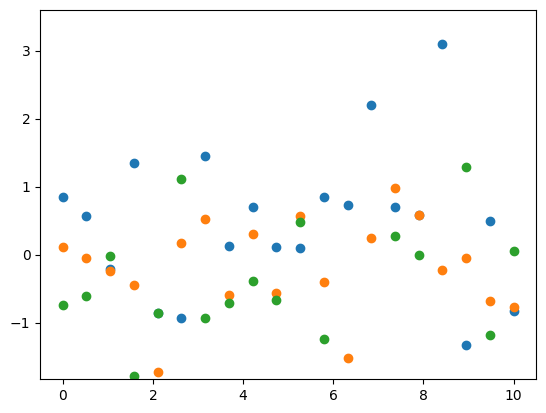

In [16]:
import matplotlib.pyplot as plt
N = 20
y = np.random.randn(N)
y2 = np.random.randn(N)
x1 = np.linspace(0, 10, N, endpoint=True)
plt.plot(x1, y, 'o')
plt.plot(x1, y2, 'o')
plt.plot(x1, y2-y, 'o')
plt.ylim([y.min()-0.5,y.max()+0.5])
plt.show()

## Indexation usuelle

Numpy permet d'accéder aux valeurs du tableau comme on le faisait pour une liste en python standard

In [17]:
print("1D :")
A = np.random.randn(10)
print(A,'\n')
print(A[1],'\n')
print(A[1:3],'\n')
print("2D :")
A = np.random.randn(5,5)
print(A,"\n")
print(A[1,1],"\n")
print(A[1:3,2:4])

1D :
[ 0.4105206   1.62802194  1.1378976   0.59032195 -1.81837649 -0.01342845
  1.01555499 -0.6786663  -1.73212125 -0.36045099] 

1.6280219425058309 

[1.62802194 1.1378976 ] 

2D :
[[ 0.90404087  1.26253224 -1.11183003 -1.35163534 -0.82873562]
 [-0.09552613 -0.06448338  1.51701253 -1.26036161  0.76519587]
 [ 1.45747713  0.06729412  1.47453353 -1.09339674  0.69798721]
 [ 0.53057752  0.83375596  1.2047513  -0.60594834 -0.36191249]
 [-0.45400681 -1.00366915  1.1490635   0.89119218 -1.64863701]] 

-0.06448338013183955 

[[ 1.51701253 -1.26036161]
 [ 1.47453353 -1.09339674]]


## Indexation avancée

Numpy permet de créer à la volée des tableaux de booléens pour chaque valeur d'un tableau suivant que cette valeur remplit ou non une condition donnée.

In [18]:
A = np.random.randn(100)
print(A)
B = A>0
print(B)
print(A[B])

[ 0.72963737 -0.72413991  0.73707459  0.51350594  1.93803514  0.92706041
  1.02145181 -1.07924168 -1.37889425 -1.85946618  0.75846457  1.14333932
  1.32962583 -0.07407002 -0.00300537  1.2722188   1.49147612  0.97285474
  1.08263545  0.14159322 -0.45861638  2.75044481 -0.37593547  0.16019596
  0.19793154 -0.32918588 -1.23698505  1.62462714 -0.03456625 -0.5202746
 -0.48047957  0.26518575 -1.26978262 -0.38183421 -1.77983784  0.16515421
  0.04184735  1.26653937 -1.5497325   0.67773495  1.18503427 -0.31962636
  0.14539982  0.10565225  0.80469953  0.71388461 -0.62126138 -1.1722085
  1.99524306  0.87282457 -0.3210113  -0.16071998  1.25272965 -0.71037723
  0.55627857 -1.48413165  2.70522616 -0.80684628  0.16699807  0.17450892
  1.45383104  0.76581922 -1.70498797  0.14660146  0.27442505  0.39086175
  1.25422082 -0.32099323 -1.00937896 -0.33436921  0.61371431 -0.13099252
  0.50837852  0.98017731  0.40090203 -0.06333716  0.88378047 -1.78516828
  0.52473247  2.22394187 -1.68894897 -0.91528675 -0.9

### Assemblage de tableaux

NumPy permet de construire des tableaux agglomérés à partir de tableaux plus petits mais de même shape sur l'axe de fusion des tableaux. C'est utile pour construire des datasets parfois. **La methode `concatenate` est surement plus intéressante car elle permet aussi de faire des fusions des axes au delà de 2 dimensions.**

In [19]:
print("Assemblage horizontale (même nombre de lignes dans les deux tableaux)")
A = np.random.randn(3,2)
B = np.random.randn(3,1)
C = np.hstack((A,B))
print("Tableaux d'origine:")
print("A = ",A)
print("B = ",B)
print("Tableau final:")
print("C = ",C)

print("Assemblage verticale (même nombre de colonnes dans les deux tableaux)")
E = np.random.randn(2,5)
F = np.random.randn(3,5)
G = np.vstack((E,F))
print("Tableaux d'origine:")
print("E = ",E)
print("F= ",F)
print("Tableau final:")
print("G = ",G)

H = np.concatenate((A,B),axis=1)
I = np.concatenate((E,F),axis=0)
print("Tableau finaux:")
print("H = ",H)
print("I = ",I)



Assemblage horizontale (même nombre de lignes dans les deux tableaux)
Tableaux d'origine:
A =  [[ 0.0722685  -1.8005642 ]
 [-0.61474715  0.04577624]
 [ 0.5651763  -0.79828394]]
B =  [[-0.77762944]
 [ 0.00904776]
 [-1.06018986]]
Tableau final:
C =  [[ 0.0722685  -1.8005642  -0.77762944]
 [-0.61474715  0.04577624  0.00904776]
 [ 0.5651763  -0.79828394 -1.06018986]]
Assemblage verticale (même nombre de colonnes dans les deux tableaux)
Tableaux d'origine:
E =  [[-0.37839396  0.94219448 -0.47552896 -0.72140945  2.01564765]
 [-0.13664671 -1.36450888 -0.80407279  0.39165826  0.76508839]]
F=  [[ 1.27926368 -0.57077277 -0.1092177   0.18802009  0.6844911 ]
 [-1.29098854 -1.40428203 -0.24812278  1.44905676  1.85583545]
 [ 0.85391939 -0.17754908  1.42859845 -1.22023003  0.15946525]]
Tableau final:
G =  [[-0.37839396  0.94219448 -0.47552896 -0.72140945  2.01564765]
 [-0.13664671 -1.36450888 -0.80407279  0.39165826  0.76508839]
 [ 1.27926368 -0.57077277 -0.1092177   0.18802009  0.6844911 ]
 [-1.2909

### Exercice

Construire une fonction d'initialisation renvoyant une matrice (m,n+1) où la dernière colonne est pleine de 1. C'est une fonction utilise pour construire les paramètres d'une classification par exemple (nous y reviendrons).

In [20]:
def initialisation(m,n):
    # m : nombre de lignes
    # n : nombre de colonnes
    # retourne une matrice aléatoire (loi uniforme) (m,n+1)
    # avec la dernière colonne remplie de "1" (biais) tout à droite
    
    # genere une matrice m,n aleatoire
    
    #M1 = np.random.random((m,n))
    #V1 = np.ones((m,1))
    #mat = np.concatenate((M1,V1),axis=1)
    
    mat = np.random.random((m,n+1))
    for i in range(m):
        mat[i,n]=1    
    
    # genere le vecteur de 1, (m,1)
    # concatene le resultat dans mat
    
    return mat

%timeit M = initialisation(7,6)
M = initialisation(7,6)
print(M)


4.65 μs ± 296 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
[[0.89556335 0.79764851 0.55925647 0.02323829 0.4348825  0.58821394
  1.        ]
 [0.45216268 0.21204214 0.33943335 0.24024177 0.30628927 0.67607236
  1.        ]
 [0.09771208 0.78920741 0.37853949 0.56794707 0.88635968 0.51167564
  1.        ]
 [0.46171273 0.9933645  0.3727561  0.05636203 0.41631474 0.08147648
  1.        ]
 [0.71084623 0.48565443 0.95412436 0.19816751 0.78498294 0.0808786
  1.        ]
 [0.23867927 0.66795912 0.07237606 0.93967196 0.19763158 0.31078744
  1.        ]
 [0.09833472 0.44401856 0.73463308 0.31835372 0.09756017 0.53432515
  1.        ]]


### Vectorisation

Numpy offre des méthodes "vectorisées" très efficaces pour calculer des choses intéressantes avec les valeurs contenues dans un tableau. Il faut absolument utiliser cette approche dans vos programmes.

In [21]:
import timeit

a = np.arange(1,10,0.1,dtype=np.float16)

def f(a):
    b=[]
    for el in a: 
        b.append(el**2+2*el+1)
    return b

#%timeit -r 7 -n 1000 f(a) 
#%timeit -r 7 -n 1000 [x**2+2*x+1 for x in a]
#%timeit -r 7 -n 1000 b = a**2 + 2*a +1 # fait 7 runs de 1000 executions chacun
%timeit -r 7 -n 1000 b = (a+1)**2 # fait 7 runs de 1000 executions chacun

6.28 μs ± 2.08 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [22]:
import timeit
a = np.arange(1,10,0.5,dtype=np.float64)
%timeit -r 7 -n 1000 b = a**2+2*a+1

6.68 μs ± 673 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [23]:
a = np.array([[1,1],[2,3]])
print(a.mean())
print(a.sum(axis=0))
print(a.prod())

1.75
[3 4]
6


 **Attention performance**  : Réécriture du calcul dans le même tableau 

In [24]:
import timeit
a = np.arange(1,1000000, dtype = np.float64)
%timeit -r 1 -n 1 c = np.sqrt(a)
%timeit -r 1 -n 1 np.sqrt(a,out=a) # on ne crée pas d'objet nouveau pour stocker le résultat.

2.93 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.04 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Application d'une fonction certains éléments seulement : la fonction at()

In [25]:
a = np.arange(1,100, dtype = np.float64)
print(a[:7])
np.sqrt.at(a,[2,4]) # on applique la racine seulement sur les éléments 2 et 4
print(a[:7])

[1. 2. 3. 4. 5. 6. 7.]
[1.         2.         1.73205081 4.         2.23606798 6.
 7.        ]


### Fonctions d'aggregation : 
certaines fonctions numpy ne s'appliquent pas à tous les éléments mais au contraire calculent des aggrégats à partir des données du tableau numpy considéré

In [26]:
a = np.arange(1,10, dtype = np.float64).reshape((3,3))
print(a)
print(a.mean())
print(a.sum())
print(a.sum(axis=0))
print(a.sum(axis=1))
print(a.prod())

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
5.0
45.0
[12. 15. 18.]
[ 6. 15. 24.]
362880.0


### Retour sur la valeur Nan (valeur contaminante)

In [27]:
a = np.arange(1,10, dtype = np.float64).reshape(3,3)
a[1,1] = np.nan
print(a.dtype)
print(a)
print(a.sum(axis=0)) # on somme les colonnes
print(a.sum(axis=1)) # on somme les lignes

print(np.mean(a))
# mais il existe des fonctions pour ignorer les valeurs nan :
print(np.nanmean(a))


float64
[[ 1.  2.  3.]
 [ 4. nan  6.]
 [ 7.  8.  9.]]
[12. nan 18.]
[ 6. nan 24.]
nan
5.0


### Broadcasting

Notion importante quand on veut faire des opérations sur des tableaux de tailles différentes. Une opération de broadcasting n'est définie que si les dimensions sont égales ou si l'une des dimensions vaut 1 sur chaque axe.
A n'appliquer que sur des tableaux de faibles dimensions car cela peut générer des tableaux de très grandes tailles difficile à concevoir.

In [28]:
a = np.array([1,2,3])
b = np.array([5,5,5])
print (a*b)

[ 5 10 15]


In [29]:
c = np.array([5]) # tableau à un seul nombre = singleton
print(a*c) # l'entier 5 a été propagé à l'ensemble des éléments du tableau de plus grande dimension

[ 5 10 15]


In [30]:
a = np.array([1,2,3]).reshape(1,3)
b = np.ones((3,3))
print(a*b)

[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


In [31]:
a = np.array([1,2,3]).reshape(3,1)
b = np.array([4,5]).reshape(1,2)
print(a*b)

[[ 4  5]
 [ 8 10]
 [12 15]]


# Pandas

Cette librairie introduit trois notions : index, Series, DataFrame
Pandas permet d'importer et d'exporter des données dans des formats variés (.csv, .json, excel, html, pickle) 

Documentation Pandas :
 - <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html" target="_blank"> Series </a >
 - <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html" target="_blank"> DataFrame </a >


Un index représente un label que l'on peut ajouter à une série de données pour mieux la décrire. 
Par exemple :

|      |
|------|
|  19  |
|  21  |
|  18  |

complétée en :

| Prénom | Age |
|--------|-----|
| Bob    | 19  |
| Alice  | 21  |
| Kevin  | 18  |

Une telle structure de données avec Pandas correspond de Series. 
Une table à deux dimensions correspond à la structure de données DataFrame.

Un index est un objet immuable qui est à la frontière entre un set et une liste : 
- un index contient des éléments qui sont "hashables" comme un set
- un index est "sliçable" comme une liste

Il définit une relation d'ordre sur les éléments stockés et peut contenir des éléments dupliqués.

Un index sur une Series va offir une interface de liste et une interface de dictionnaire.
En pratique les index sont le plus souvent créés à l'importation des données automatiquement par Pandas.

## Series

<div style="width: 900px; color:#FF0000; padding-top:10px; padding-bottom:10px;border: 3px solid #A0A0A0; text-align: left;background: #C0C0C0;">  <strong> Remarque : </strong> Le slicing sur les labels entre les labels i et j d'une Series (ou d'un DataFrame) renvoie les éléments de i à j inclus  </div>

In [32]:
import pandas as pd

In [33]:
s = pd.Series([10,15,20,25],
             index = ['bob', 'bill', 'robert', 'denis'])

In [34]:
s

bob       10
bill      15
robert    20
denis     25
dtype: int64

In [35]:
s.values

array([10, 15, 20, 25])

In [36]:
s.index

Index(['bob', 'bill', 'robert', 'denis'], dtype='object')

### La fonction loc()

<div style="width: 900px; color:#FF0000; padding-top:10px; padding-bottom:10px;border: 3px solid #A0A0A0; text-align: left;background: #C0C0C0;">  <strong> Remarque : </strong> L'accès à l'attribut d'une Series ou d'un DataFrame doit utiliser les fonctions loc() ou iloc() pour éviter des effets de bords parfois difficile à cerner. </div>

In [37]:
#s['bob'] à ne pas utiliser
s.loc['bob'] # utiliser .loc est indispensable pour éviter des effets de bords autrement difficiles à contrôler.

np.int64(10)

In [38]:
s.loc['bob':'robert'] # Attention la slice indiquée avec deux labels i et j va de i à j inclus (contrairement au slicing usuel)
# on va de 'bob' à 'robert' inclus !

bob       10
bill      15
robert    20
dtype: int64

La relation d'ordre est créée sur les éléments de l'index est créée au moment de la création de l'index :

In [39]:
s = pd.Series([10,15,20,25],
             index = ['bob', 'bill', 'robert', 'denis'])
print(s.loc['bob':'denis'])

s = pd.Series([10,20,15,25],
             index = ['bob', 'robert', 'bill','denis'])
print("\n")
print(s.loc['bob':'denis'])

bob       10
bill      15
robert    20
denis     25
dtype: int64


bob       10
robert    20
bill      15
denis     25
dtype: int64


<div style="width: 900px; color:#FF0000; padding-top:10px; padding-bottom:10px;border: 3px solid #A0A0A0; text-align: left;background: #C0C0C0;">  <strong> Remarque : </strong> Le slicing sur les labels ne marchent pas si vous avez des labels dupliqués et qu'en plus, l'index n'a pas été trié. Pensez donc à trier votre index par défaut de manière à ce que le slicing soit bien possible.  
<strong>Le tri de l'index augmente significativement les performances par ailleurs.</strong>
</div>

La commande à utiliser est `s = s.sort_index()`pour réaffecter à s son index trié.

In [134]:
animaux = ['chien', 'chat', 'chat', "chien", "poisson"]
owners = ['bob', 'robert', 'bill','denis','bob']
s = pd.Series(animaux, index=owners)

In [41]:
s

bob         chien
robert       chat
bill         chat
denis       chien
bob       poisson
dtype: object

In [42]:
s = s.sort_index()
print(s.index)
print(s.loc['bob': 'denis'])


Index(['bill', 'bob', 'bob', 'denis', 'robert'], dtype='object')
bob        chien
bob      poisson
denis      chien
dtype: object


### la fonction iloc()
<div style="width: 900px; color:#FF0000; padding-top:10px; padding-bottom:10px;border: 3px solid #A0A0A0; text-align: left;background: #C0C0C0;">  <strong> Remarque : </strong> L'accès à une slice via la fonction iloc() utilisant des indices fonctionnent comme les slices numpy usuelles, donc de i à j-1 </div>

In [43]:
print(s)
s.iloc[0] # accède à l'attribut 0 de la Series

bill         chat
bob         chien
bob       poisson
denis       chien
robert       chat
dtype: object


'chat'

In [44]:
s.iloc[1:6:2]

bob      chien
denis    chien
dtype: object

In [45]:
s.iloc[1:6:2].values

array(['chien', 'chien'], dtype=object)

In [46]:
s.iloc[1:6:2].index

Index(['bob', 'denis'], dtype='object')

## Slicing complexe à la numpy

Pandas étant basé sur NumPy, il permet d'accéder à un slincing complexe analogue à celui utilisable dans NumPy.

In [135]:
s=='chien'

bob        True
robert    False
bill      False
denis      True
bob       False
dtype: bool

In [48]:
s.loc[(s=='chien') | (s=='poisson')] # notez bien les () autour de chaque condition...

bob        chien
bob      poisson
denis      chien
dtype: object

In [49]:
s.loc[(s=='chien') & (len(s)==5)] # notez bien les () autour de chaque condition...

bob      chien
denis    chien
dtype: object

In [50]:
print(s)
t = s.loc[(s=='chien')|(s=='poisson')] = "tortue"
print(t)

bill         chat
bob         chien
bob       poisson
denis       chien
robert       chat
dtype: object
tortue


In [51]:
s

bill        chat
bob       tortue
bob       tortue
denis     tortue
robert      chat
dtype: object

### Opérations sur les Series

Pandas permet de faire un alignement automatique des labels pour faire des opérations sur les attributs de Series (et de DataFrame).

In [52]:
val = [10, 12, 13, 15, 17]
lab = ['a', 'b', 'c','d','e']
s1 = pd.Series(val, index=lab)

val2 = [10, 12, 13, 15, 17]
lab2 = ['a', 'c', 'g','h','i']

s2 = pd.Series(val2, index=lab2)
print(s1)
print(s2)

a    10
b    12
c    13
d    15
e    17
dtype: int64
a    10
c    12
g    13
h    15
i    17
dtype: int64


In [53]:
s3 = s1 + s2 # l'addition n'est possible que si j'ai le meme label dans les deux séries
# sinon l'opération n'est pas définie car on ne connait qu'un seul élément de l'addition
print(s3)

a    20.0
b     NaN
c    25.0
d     NaN
e     NaN
g     NaN
h     NaN
i     NaN
dtype: float64


In [54]:
s1.add(s2)

a    20.0
b     NaN
c    25.0
d     NaN
e     NaN
g     NaN
h     NaN
i     NaN
dtype: float64

In [55]:
s1.add(s2, fill_value=20) # permet de remplacer les valeurs manquantes, attention le resultat a un dtype float64...

a    20.0
b    32.0
c    25.0
d    35.0
e    37.0
g    33.0
h    35.0
i    37.0
dtype: float64

### Exercice à réaliser

Créer une série de 1000 termes entiers tirés au hasard dans l'intervalle [5,100] labélisés par une chaine de 4 caractères tirés au hasard. La stocker dans un fichier : maserie.csv

Dans un second temps, relire les données de votre série dans le fichier maserie.csv, puis calculer la moyenne des termes de la serie et la moyenne des termes compris entre 50 et 100.

In [152]:
my_serie = np.random.randint(5,100,1000)
rand_index = np.random.randint(0, 25, 4 * 1000)
char_index = []
for i in range(len(rand_index) // 4):
    char_index.append(chr(rand_index[i]+97) + chr(rand_index[i + 1000]+97) + chr(rand_index[i + 2000]+97) +chr(rand_index[i + 3000]+97))
s = pd.Series(my_serie, index=char_index)
s.to_csv("maserie.csv")
print("Series saved to csv")

s = pd.read_csv("maserie.csv", index_col=0)
s = pd.Series(s.values.flatten(), index=s.index)
mean = s.values.sum() / len(s.values)
print(mean)
filtered_s = s.loc[s > 50].values.sum() / len(s.loc[s > 50].values)
print(filtered_s)

Series saved to csv
50.552
74.5863453815261


## DataFrames

Ressources en ligne : 
- <a href="https://www.youtube.com/watch?v=P3JPvTVP4aA&list=PL2CXLryTKuwwy0jaLB10vXU6_Tkk4yPC4&index=7" target="_blank"> Cours INRIA, Université Côte d'Azur - Pandas : le type DataFrame </a >
- <a href="https://www.youtube.com/watch?v=o4yZiZWP8Iw&list=PL2CXLryTKuwwy0jaLB10vXU6_Tkk4yPC4&index=8" target="_blank"> Cours INRIA, Université Côte d'Azur - Pandas : opération avancées </a >
- <a href="https://www.youtube.com/watch?v=zZkNOdBWgFQ&feature=emb_rel_end" target="_blank"> Pandas Python en français </a >

Documentation Pandas :
 - <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html" target="_blank"> DataFrame </a >


In [109]:
import numpy as np
import pandas as pd

In [110]:
labs = ['bob','rené','bill','eva']
ages = pd.Series([18,20,21,32], index = labs)
tailles = pd.Series([180,201,194,170], index = labs)
sexes = pd.Series(list('hhhf'),index = labs)
df = pd.DataFrame({'age': ages,
                   'taille': tailles,
                   'sexe': sexes})
df.style.background_gradient(cmap="Blues")

,age,taille,sexe
bob,18,180,h
rené,20,201,h
bill,21,194,h
eva,32,170,f


In [111]:
df

,age,taille,sexe
bob,18,180,h
rené,20,201,h
bill,21,194,h
eva,32,170,f


In [112]:
df.index

Index(['bob', 'rené', 'bill', 'eva'], dtype='object')

In [113]:
df.columns

Index(['age', 'taille', 'sexe'], dtype='object')

In [114]:
df.values

array([[18, 180, 'h'],
       [20, 201, 'h'],
       [21, 194, 'h'],
       [32, 170, 'f']], dtype=object)

In [115]:
df.head(2)

,age,taille,sexe
bob,18,180,h
rené,20,201,h


In [116]:
df.tail(2)

,age,taille,sexe
bill,21,194,h
eva,32,170,f


In [117]:
df.describe()

,age,taille
count,4.000000,4.000000
mean,22.750000,186.250000
std,6.291529,13.913423
min,18.000000,170.000000
25%,19.500000,177.500000
50%,20.500000,187.000000
75%,23.750000,195.750000
max,32.000000,201.000000


### Indexation dans les dataframes

Elle se fait comme dans les Series sauf qu'on a maintenant des lignes et des colonnes.

In [118]:
df.loc['bob'] # accede aux données de la ligne indexée par le label 'bob'

age        18
taille    180
sexe        h
Name: bob, dtype: object

In [119]:
df.loc['bob','age'] # l'age de bob

np.int64(18)

In [120]:
df.loc[:,'age'] # recupère la colonne 'age' du dataframe toutes les lignes (':'),

bob     18
rené    20
bill    21
eva     32
Name: age, dtype: int64

In [121]:
df.loc[df.loc[:,'age']>30]

,age,taille,sexe
eva,32,170,f


Utile : utiliser les labels comme une nouvelle colonne et indexer par rapport à une nouvelle colonne

In [122]:
df = df.reset_index()

In [123]:
df

,index,age,taille,sexe
0,bob,18,180,h
1,rené,20,201,h
2,bill,21,194,h
3,eva,32,170,f


In [124]:
df.rename(columns={'index':'prenom'}) # on lui passe un dictioinnaire de substitution

,prenom,age,taille,sexe
0,bob,18,180,h
1,rené,20,201,h
2,bill,21,194,h
3,eva,32,170,f


In [125]:
df = df.set_index('age')

In [73]:
df

,index,taille,sexe
age,,,
18,bob,180,h
20,rené,201,h
21,bill,194,h
32,eva,170,f


In [74]:
labs = ['bob','rené','bill','eva']
ages = pd.Series([18,20,21,32], index = labs)
tailles = pd.Series([180,201,194,170], index = labs)
sexes = pd.Series(list('hhhf'),index = labs)
df = pd.DataFrame({'age': ages,
                   'taille': tailles,
                   'sexe': sexes})
print(df)

df = (df.reset_index().rename(columns={'index':'nom'}).set_index('age'))
print(df)

      age  taille sexe
bob    18     180    h
rené   20     201    h
bill   21     194    h
eva    32     170    f
      nom  taille sexe
age                   
18    bob     180    h
20   rené     201    h
21   bill     194    h
32    eva     170    f


In [75]:
df1 = pd.DataFrame(np.ones((2,2)), index=list('ab'), columns=list('xy'))
df2 = pd.DataFrame(np.ones((2,2)), index=list('ac'), columns=list('xz'))
print(df1)
print(df2)

     x    y
a  1.0  1.0
b  1.0  1.0
     x    z
a  1.0  1.0
c  1.0  1.0


In [76]:
df1+df2

,x,y,z
a,2.0,NaN,NaN
b,NaN,NaN,NaN
c,NaN,NaN,NaN


In [77]:
df2 = df1.add(df2, fill_value=0)

In [126]:
df2 # les valeurs pour lesquelles il me manquent les deux valeurs, j'ai toujours un Nan

,a,b
z,9,8
t,6,4


In [79]:
df3 = df2.fillna(-1)

In [80]:
df3

,x,y,z
a,2.0,1.0,1.0
b,1.0,1.0,-1.0
c,1.0,-1.0,1.0


In [81]:
#df4 = df2.dropna(axis=0)
df4 = df2.dropna(axis=1)

In [82]:
df4

,x
a,2.0
b,1.0
c,1.0


### Concatenation, Merge et Pivots : des commandes usuelles dans la manipulations de bases de données

In [83]:
df1 = pd.DataFrame(np.random.randint(1,10,size=(2,2)), index=list('xy'), columns=list('ab'))
df2 = pd.DataFrame(np.random.randint(1,10,size=(2,2)), index=list('zt'), columns=list('ab'))

In [84]:
df1

,a,b
x,1,6
y,5,3


In [85]:
df2

,a,b
z,9,8
t,6,4


### Aligner les colonnes (l'un dessous l'autre)

#### concat()

In [86]:
pd.concat([df1,df2])

,a,b
x,1,6
y,5,3
z,9,8
t,6,4


In [87]:
df3 = pd.DataFrame(np.random.randint(1,10,size=(2,2)), index=list('xy'), columns=list('ab'))
df4 = pd.DataFrame(np.random.randint(1,10,size=(2,2)), index=list('xy'), columns=list('cd'))
df3

,a,b
x,8,9
y,2,6


In [88]:
df4

,c,d
x,9,6
y,7,1


In [89]:
pd.concat([df3,df4], axis=1)

,a,b,c,d
x,8,9,9,6
y,2,6,7,1


#### merge() ( join() moins générale)

In [90]:
df5 = pd.DataFrame({'personnel': ['robert','louis','marcel'],
                    'groupe': ['vente','R&D','RH']})
df6 = pd.DataFrame({'personnel': ['robert','louis','marcel'],
                    'date embauche': [2003,1999,2017],
                   })
print(df5)
print(df6)

  personnel groupe
0    robert  vente
1     louis    R&D
2    marcel     RH
  personnel  date embauche
0    robert           2003
1     louis           1999
2    marcel           2017


In [91]:
df7 = pd.merge(df5,df6)
print(df7)

  personnel groupe  date embauche
0    robert  vente           2003
1     louis    R&D           1999
2    marcel     RH           2017


## 1er exemple de manipulation : le dataset titanic

In [170]:
%pip install --upgrade pandas


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [92]:
import numpy as np
import pandas as pd
import seaborn as sns

In [93]:
dftitanic = sns.load_dataset('titanic')
dftitanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [94]:
mydf = dftitanic.drop(['pclass','alive','sibsp','parch','fare','embarked','who','adult_male','deck','embark_town','alone'],axis=1) 

In [163]:
mydf = sns.load_dataset('titanic').loc[:,['survived','sex','class','age']]

In [158]:
def load_titanic():
    df = sns.load_dataset('titanic')
    return df.drop(['pclass','alive','sibsp','parch','fare','embarked','who','adult_male','deck','embark_town','alone'],axis=1)

In [161]:
%timeit -r 10 -n 1000 load_titanic()

4.76 ms ± 145 μs per loop (mean ± std. dev. of 10 runs, 1,000 loops each)


In [162]:
%timeit -r 10 -n 1000 mydf = sns.load_dataset('titanic').loc[:,['survived','sex','class','age']]

4.86 ms ± 172 μs per loop (mean ± std. dev. of 10 runs, 1,000 loops each)


In [96]:
mydf.head(5)

,survived,sex,class,age
0,0,male,Third,22.0
1,1,female,First,38.0
2,1,female,Third,26.0
3,1,female,First,35.0
4,0,male,Third,35.0


In [97]:
print(mydf.loc[:,'age'].mean())
print(mydf.loc[:,'class'].value_counts())

29.69911764705882
class
Third     491
First     216
Second    184
Name: count, dtype: int64


In [98]:
mydf.shape
mydf.describe() # regarder la ligne count --> il manque des données non renseignées pour l'age

,survived,age
count,891.000000,714.000000
mean,0.383838,29.699118
std,0.486592,14.526497
min,0.000000,0.420000
25%,0.000000,20.125000
50%,0.000000,28.000000
75%,1.000000,38.000000
max,1.000000,80.000000


#### on peut avoir envie de combler l'info manquante ou de supprimer les data incomplètes 

In [99]:

mydf_fill = mydf.copy(deep=True)
mydf_fill.loc[:,'age'].fillna(mydf_fill.loc[:,'age'].mean(), inplace = True) # remplace par l'age moyen les NaN dans la table
mydf_fill.describe()

/tmp/ipykernel_9830/8645001.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mydf_fill.loc[:,'age'].fillna(mydf_fill.loc[:,'age'].mean(), inplace = True) # remplace par l'age moyen les NaN dans la table


,survived,age
count,891.000000,891.000000
mean,0.383838,29.699118
std,0.486592,13.002015
min,0.000000,0.420000
25%,0.000000,22.000000
50%,0.000000,29.699118
75%,1.000000,35.000000
max,1.000000,80.000000


In [100]:
mydf_drop = mydf.copy(deep=True)
mydf_drop = mydf.dropna(axis=0) # on jette les lignes avec des valeurs NaN
#mydf_drop = mydf.dropna(axis=1) # on jette les colonnes avec des valeurs NaN
mydf_drop.describe()

,survived,age
count,714.000000,714.000000
mean,0.406162,29.699118
std,0.491460,14.526497
min,0.000000,0.420000
25%,0.000000,20.125000
50%,0.000000,28.000000
75%,1.000000,38.000000
max,1.000000,80.000000


In [164]:
mydf.loc[:,'survived'].mean() # taux survie global

np.float64(0.3838383838383838)

In [165]:
mydf.loc[mydf.loc[:,'class']=='First','survived'].mean() # taux de survie des passagers en première classe

np.float64(0.6296296296296297)

In [166]:
mydf.loc[mydf.loc[:,'class']=='Third','survived'].mean() # taux de survie des passagers en troisième classe

np.float64(0.24236252545824846)

### Mais on peut regrouper les données par classes en une fois grâce à l'opération groupeby

<par> </par>

<div style="width: 900px; color:#FF0000; padding-top:10px; padding-bottom:10px;border: 3px solid #A0A0A0; text-align: left;background: #C0C0C0;">  <strong> Remarque : </strong> si on applique une fonction qui n'est pas définie sur une colonne donnée, comme par exemple la fonction 'mean()' sur les colonnes 'sex' et 'class', les colonnes sont ignorées. </div>

In [167]:
mydf.groupby('class')

/tmp/ipykernel_9830/1640420237.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mydf.groupby('class')


In [168]:
g = mydf.groupby('class').mean()
g

/tmp/ipykernel_9830/1626224547.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = mydf.groupby('class').mean()


TypeError: agg function failed [how->mean,dtype->object]

In [153]:
print(g.index)

NameError: name 'g' is not defined

In [169]:
mydf.groupby(['class','sex']).mean()

/tmp/ipykernel_9830/2282696685.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mydf.groupby(['class','sex']).mean()


survived        age
class  sex                        
First  female  0.968085  34.611765
       male    0.368852  41.281386
Second female  0.921053  28.722973
       male    0.157407  30.740707
Third  female  0.500000  21.750000
       male    0.135447  26.507589

In [ ]:
g = mydf.groupby(['class','sex']).mean()
print(g.index)

### Généralisation du groupby à deux dimensions : l'opération pivot_table()

In [ ]:
mydf.pivot_table('survived',
                aggfunc = np.mean, # la moyenne est la fonction par défaut
                index = 'class',
                 columns = 'sex' 
                )

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


### Graphiques avec Pandas

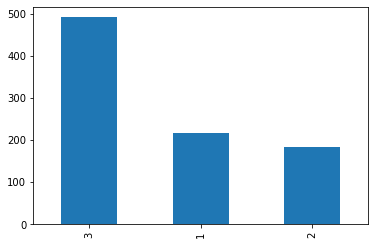

In [ ]:
df = sns.load_dataset('titanic')
df.loc[:,'pclass'].value_counts().plot.bar()

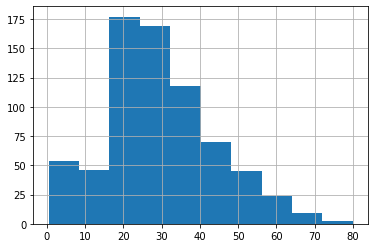

In [ ]:
df.loc[:,'age'].hist()

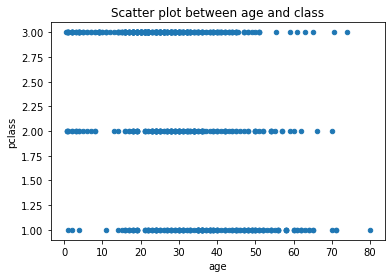

In [ ]:
df.plot.scatter(x='age',y='pclass', title= "Scatter plot between age and class")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa84c034f70>,
      dtype=object)

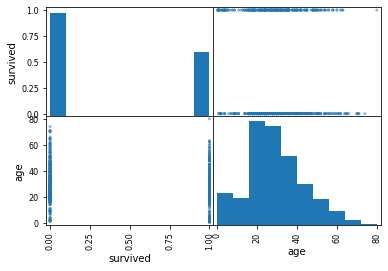

In [ ]:
mydf = sns.load_dataset('titanic').loc[:,['survived','sex','class','age']]
pd.plotting.scatter_matrix(mydf)

### Gestion des fichiers de données avec Pandas

Dans ce qui précède, on a utilisé le package seaborn pour récupérer le dataset mais on peut aussi télécharger le fichier sur le site kaggle.com <a href="https://www.kaggle.com/hesh97/titanicdataset-traincsv" target="_blank"> ici </a > et le charger dans le programme grâce à Pandas.

In [173]:
%curl -L -o ./Datasets/titanicdataset-traincsv.zip\ https://www.kaggle.com/api/v1/datasets/download/hesh97/titanicdataset-traincsv

UsageError: Line magic function `%curl` not found.


In [ ]:
dffromcsv = pd.read_csv("../Datasets/Titanic.csv")

In [ ]:
dffromcsv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Gestion des dates et des séries temporelles avec Pandas

Ressources en ligne : 
- <a href="https://www.youtube.com/watch?v=ttDUzYOYrO4&list=PL2CXLryTKuwwy0jaLB10vXU6_Tkk4yPC4&index=9"
     target="_blank"> Cours INRIA, Université Côte d'Azur - Pandas : dates et séries temporelles </a >

## Exercice :

1) Faite une analyse d'un dataset de votre choix à télécharger sur Kaggle.com :

Par exemple, https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017

2) Trouver les variables intéressantes pour faire une regresssion des prix de l'immobilier avec les caractéristiques des maisons en utilisant la fonction pandas.plotting.scatter_matrix(df).

https://www.kaggle.com/lespin/house-prices-dataset (utiliser le fichier train.csv)

Jupiter Notebook intitulé **prenom.nom-TPPandas.ipynb** à envoyer par mail à bertrand.laforge@sorbonne-universite.fr avant **samedi 17/2/2024 à 17h**. Votre fichier sera commenté (commentaire Markdown) pour expliquer ce que vous calculez et ce que vous représentez sur les figures. Vous commenterez ce que vous déduisez des figures et des calculs effectués.

3) joignez en début de document, 3 questions de quiz de votre fabrication portant sur les éléments de cours que vous avez eu jusqu'à présent dans une rubrique quiz de votre notebook avec 4 réponses possibles par question si possible.
    